# CityBikes

Send a request to CityBikes for the city of your choice. 

In [1]:
import pandas as pd
import requests
import os
import json
from IPython.display import JSON
import matplotlib.pyplot as plt

In [2]:
# this is the given URL from the city bikes API

url = "http://api.citybik.es/v2/networks"

In [3]:
# like many other APIs, we can set up parameters that we can work with and follow the API documentation
# on how they want it set up. Here we submit them through fields

params = {
    'fields':'id,name,href'
}
# The line below creates the call to the API with our edited parameters and/or authorization
# We test below with "response.json()", but the output is lengthy and commented out for space conservation
response = requests.get(url = url, params=params)
# response.json()

In [4]:
# from the "response.json()" I found Leipzig and the string required to call it. 
leipzig = '/nextbike-leipzig'

#response is then updated to include Leipzig
response = requests.get(url = url + leipzig)
# type(response)
# response.json()


Parse through the response to get the details you want for the bike stations in that city (latitude, longitude, number of bikes). 

In [6]:
# create a dataframe from the url that we were working with

df_city_bike = response.json()

In [8]:
# we find stations holds information about the latitude, longitude and the number of free bikes available.
# create a variable of ease of use

stations = df_city_bike['network']['stations']

# check the length of the new variable to see if it has an appropriate number of locations to work with and
# for API limits

len(stations)

88

In [11]:
# create new lists to hold the chosen information from the city bikes API

free_bikes = []
station_name = []
latitude = []
longitude = []

for station in stations:
    free_bikes.append(station["free_bikes"])
    station_name.append(station["name"])
    latitude.append(station["latitude"])
    longitude.append(station["longitude"])

Put your parsed results into a DataFrame.

In [14]:
# combine created lists into a zipped list

Leipzig_list = list(zip(free_bikes, station_name, latitude, longitude))

# convert the list into a dataframe and name the columns appropriately
df_Leipzig = pd.DataFrame(Leipzig_list)
df_Leipzig.columns = ['free_bikes', 'station_name', 'latitude', 'longitude']
#type(df_Leipzig)      # test to see if a dataframe is returned, and it was.
df_Leipzig

,free_bikes,station_name,latitude,longitude
0,10,VELO-CITY / Hauptbahnhof/LVB-Mobilitätszentrale,51.343658,12.378786
1,0,Virchowstr. (LVB Mobilitätsstation 23),51.375490,12.378652
2,1,S-Bhf. Leutzsch,51.353337,12.303199
3,8,Siemens AG,51.350020,12.291401
4,0,Galopprennbahn (Vorplatz/Zufahrtsstraße),51.326737,12.358117
...,...,...,...,...
83,0,VELO-CITY / Bayrischer Bhf,51.330330,12.380921
84,0,VELO-CITY / BurgPlatz,51.337020,12.373170
85,0,VELO-CITY / ThomasKirche,51.339631,12.373137
86,0,VELO-CITY / GoerdelerRing,51.343923,12.370262


In [15]:
# convert the data frame into a csv for ease of access.
df_Leipzig.to_csv('Leipzig.csv')

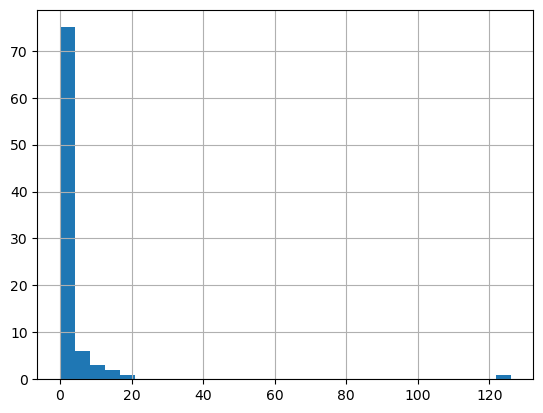

In [18]:
# view distribution of bikes

hist = df_Leipzig['free_bikes'].hist(bins=30)